In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
%matplotlib inline

In [46]:
# In R, I exported the dataset from package 'ISLR' to an Excel file
df = pd.read_excel('Default.xlsx')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 

df['student2'] = df.student.factorize()[0]
df['default2'] = df.default.factorize()[0]

df.head(3)

# removing zero LTI 
df = df[df['LTI']!= 0]
df.head(3)

,ID,default,student,balance,income,Age,LTI,Months Delayed,student2,default2
0,1,No,No,729.526495,44361.625074,50.0,0.016445,0,0,0
1,2,No,Yes,817.180407,12106.134700,25.0,0.067501,0,1,0
2,3,No,No,1073.549164,31767.138947,39.0,0.033794,0,0,0


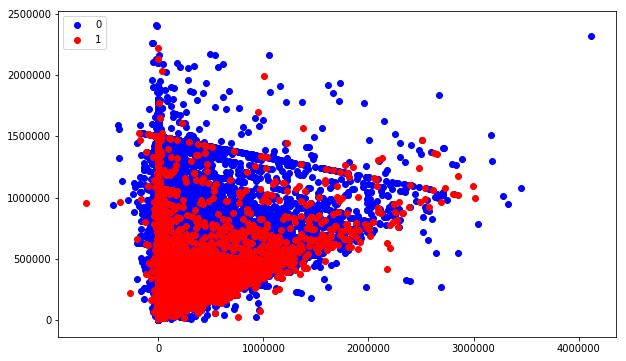

In [47]:

X = df[['balance','income', 'Age', 'LTI','Months Delayed', 'student2']].values

y = df.default2.values

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [48]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(X,y)
    y_pred = lassoreg.predict(X)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(y,y_pred)
        #plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y**2))
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

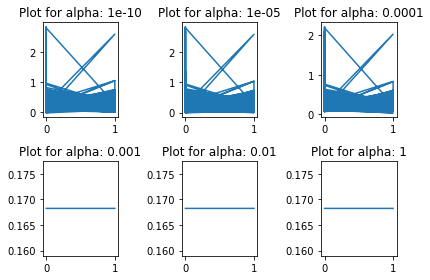

In [50]:

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] +  (df.columns[3:9].values.tolist())
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(X, y, alpha_lasso[i], models_to_plot)



In [52]:
coef_matrix_lasso

,rss,intercept,balance,income,Age,LTI,Months Delayed,student2
alpha_1e-15,-2.88236e-12,0.124217,1.18878e-08,-4.68879e-08,-0.000957979,0.0710317,0.0610803,-0.00437053
alpha_1e-10,1.82565e-12,0.124217,1.18878e-08,-4.68878e-08,-0.000957975,0.0710317,0.0610803,-0.0043704
alpha_1e-08,-4.93605e-13,0.1242,1.189e-08,-4.68807e-08,-0.000957601,0.0710299,0.0610789,-0.00435722
alpha_1e-05,2.17193e-12,0.114164,1.58287e-09,-3.68906e-08,-0.000712801,0.0715525,0.0591449,0
alpha_0.0001,1.27587e-12,0.0980201,0,-0,-0,0.0552989,0.0446597,0
alpha_0.001,1.06248e-10,0.168227,0,-0,-0,0,0,0
alpha_0.01,1.06248e-10,0.168227,0,-0,-0,0,0,0
alpha_1,1.06248e-10,0.168227,0,-0,-0,0,0,0
alpha_5,1.06248e-10,0.168227,0,-0,-0,0,0,0
alpha_10,1.06248e-10,0.168227,0,-0,-0,0,0,0


In [53]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)



alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     1
alpha_0.0001    4
alpha_0.001     6
alpha_0.01      6
alpha_1         6
alpha_5         6
alpha_10        6
dtype: int64

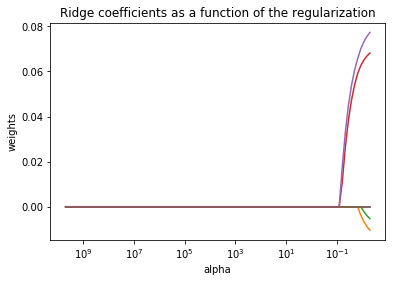

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');

In [60]:

from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X), y)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [61]:
lassocv.alpha_

0.0015794602037294417

In [64]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X), y)
#mean_squared_error(y_test, lasso.predict(scale(X_test)))
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=(df.columns[3:9].values))

balance           0.001204
income           -0.014329
Age              -0.008278
LTI               0.070343
Months Delayed    0.081293
student2          0.000000
dtype: float64